Assignment 2: Cleaning and Preparing a Travel Customer Reviews Dataset
Objective:
To clean and prepare a dataset containing customer reviews of travel experiences.
Instructions:
Load the dataset containing customer reviews, ratings, and feedback.
Handle missing values:
Identify missing values in Review_Text, Rating, and Customer_Age.
Impute missing numerical values using appropriate techniques.
Use NLP-based techniques to handle missing textual data.
Detect and remove duplicates:
Use duplicated() to find repeated reviews.
Remove or merge duplicate records.
Handle inconsistent data:
Standardize Rating values (ensure they range between 1-5).
Correct spelling inconsistencies in Tour_Package names.
Identify and handle outliers:
Use boxplots to find anomalies in Package_Price and Rating.
Apply transformation techniques if necessary.
Prepare cleaned data for analysis:
Convert categorical data into numerical format where required.
Save the final cleaned dataset as a CSV file.

In [5]:
!pip install pyspellchecker

In [9]:
import nltk
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dhari\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

Booking_ID        0
Destination      27
Package_Price    20
Customer_Age     15
Rating           25
Review_Text      20
Travel_Date      10
dtype: int64


C:\Users\dhari\AppData\Local\Temp\ipykernel_25440\488797189.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review_Text'].fillna('', inplace=True)  # Fill with empty string initially


5


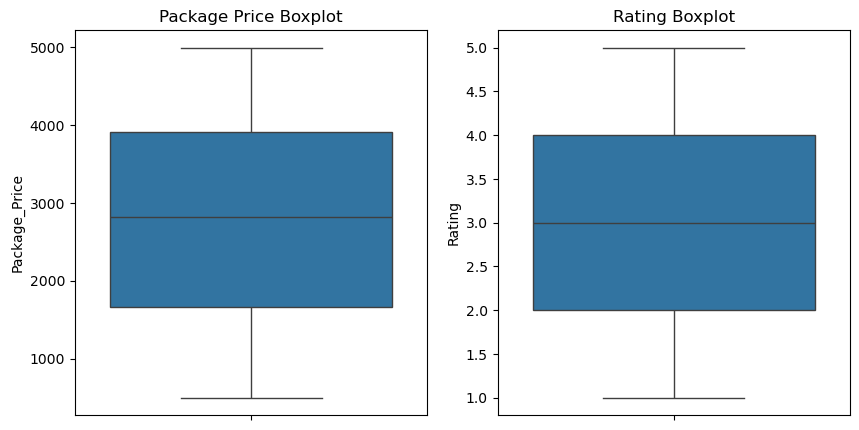

Cleaned dataset saved to cleaned_travel_reviews.csv
   Booking_ID Destination  Package_Price  Customer_Age  Rating  \
0           1      London         1094.0          21.0     NaN   
1           2       Paris          640.0          20.0     NaN   
2           3   Singapore         3393.0          42.0     3.0   
3           4      London         3555.0          40.0     4.0   
4           5       Dubai         2130.0          44.0     2.0   

          Review_Text Travel_Date  
0  amazing experience  2023-01-01  
1          loved trip  2023-01-02  
2        could better  2023-01-03  
3  amazing experience  2023-01-04  
4  highly recommended  2023-01-05  


In [11]:
import pandas as pd
import numpy as np
import re
from sklearn.impute import SimpleImputer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources (do this once)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# 1. Load the dataset
df = pd.read_csv("Tours_and_Travels.csv", encoding='unicode_escape')  # Replace with your dataset filename and handle encoding

# 2. Handle missing values
# Identify missing values
print(df.isnull().sum())

# Impute missing numerical values (Customer_Age - if it exists)
if 'Customer_Age' in df.columns:  # Check if the column exists before imputing
    imputer_age = SimpleImputer(strategy='mean')  # Or 'median'
    df['Customer_Age'] = imputer_age.fit_transform(df[['Customer_Age']])

# Handle missing textual data (Review_Text, if it exists) using NLP
if 'Review_Text' in df.columns:
    df['Review_Text'].fillna('', inplace=True)  # Fill with empty string initially

    def preprocess_text(text):
        text = text.lower()  # Lowercasing
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        tokens = word_tokenize(text)  # Tokenization
        stop_words = set(stopwords.words('english'))
        tokens = [w for w in tokens if not w in stop_words]  # Remove stopwords
        return " ".join(tokens)

    df['Review_Text'] = df['Review_Text'].apply(preprocess_text)

# 3. Detect and remove duplicates
print(df.duplicated().sum())  # Check for duplicates
df.drop_duplicates(inplace=True)  # Remove duplicates

# 4. Handle inconsistent data
# Standardize Rating values (if it exists)
if 'Rating' in df.columns:
    df['Rating'] = df['Rating'].clip(1, 5)  # Ensure rating is between 1 and 5

if 'Tour_Package' in df.columns:
    spell = SpellChecker()

    def correct_spelling(text):
        if isinstance(text, str):  # Check if it's a string before correcting
            corrected_text = []
            for word in text.split():
                corrected_word = spell.correction(word)
                corrected_text.append(corrected_word)
            return " ".join(corrected_text)
        else:
            return text # Return original if it's not a string

    df['Tour_Package'] = df['Tour_Package'].apply(correct_spelling)


# 5. Identify and handle outliers
# Boxplots for Package_Price and Rating (if they exist)
if 'Package_Price' in df.columns and 'Rating' in df.columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df['Package_Price'])
    plt.title('Package Price Boxplot')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['Rating'])
    plt.title('Rating Boxplot')
    plt.show()
    Q1 = df['Package_Price'].quantile(0.25)
    Q3 = df['Package_Price'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df['Package_Price'] = np.where(df['Package_Price'] > upper_bound, upper_bound, df['Package_Price'])


# 6. Prepare cleaned data for analysis
# Convert categorical data (Tour_Package, if it exists) to numerical using one-hot encoding
if 'Tour_Package' in df.columns:
    df = pd.get_dummies(df, columns=['Tour_Package'], prefix='Tour_Package')  # Example, adapt as needed

# 7. Save the final cleaned dataset
df.to_csv("cleaned_travel_reviews.csv", index=False)

print("Cleaned dataset saved to cleaned_travel_reviews.csv")
print(df.head())  # Display the first few rows of the cleaned data